In [5]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

### Linear Regression

$$w := w - \alpha \frac{1}{m} \sum_{i=1}^{m} (h_w(x^{(i)}) - y^{(i)}) x^{(i)}$$

In [6]:
class Linear_Regression:
    
#Initiating the parameters
    def __init__(self, learning_rate, no_of_iterations):
        self.learning_rate = learning_rate
        self.no_of_iterations = no_of_iterations

    def fit(self, X, Y):
        self.m, self.n = X.shape  # Number of Rows and Columns
        # Initiating the weight and bias     
        self.w = np.zeros(self.n)
        self.b = 0
        self.X = X
        self.Y = Y

        # Implementing Gradient Descent
        for i in range(self.no_of_iterations):
            self.update_weights()

    def update_weights(self):
        Y_prediction = self.predict(self.X)
        
        dw = - (2 * (self.X.T).dot(self.Y - Y_prediction)) / self.m
        
        db = - 2 * np.sum(self.Y - Y_prediction) / self.m

        # updating the weights
        self.w = self.w - self.learning_rate * dw
        self.b = self.b - self.learning_rate * db

    def predict(self, X):
        return X.dot(self.w) + self.b

### Data Pre-Processing

In [7]:
df = pd.read_csv("salary_data.csv")
df.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [8]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 612.0 bytes


In [9]:
df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

### Splitting the feature and & target

In [11]:
X = df.iloc[:,:-1].values
Y = df.iloc[:,1].values
print(X)

[[ 1.1]
 [ 1.3]
 [ 1.5]
 [ 2. ]
 [ 2.2]
 [ 2.9]
 [ 3. ]
 [ 3.2]
 [ 3.2]
 [ 3.7]
 [ 3.9]
 [ 4. ]
 [ 4. ]
 [ 4.1]
 [ 4.5]
 [ 4.9]
 [ 5.1]
 [ 5.3]
 [ 5.9]
 [ 6. ]
 [ 6.8]
 [ 7.1]
 [ 7.9]
 [ 8.2]
 [ 8.7]
 [ 9. ]
 [ 9.5]
 [ 9.6]
 [10.3]
 [10.5]]


In [14]:
print(Y)

[ 39343  46205  37731  43525  39891  56642  60150  54445  64445  57189
  63218  55794  56957  57081  61111  67938  66029  83088  81363  93940
  91738  98273 101302 113812 109431 105582 116969 112635 122391 121872]


### Splitting the dataset into training & test data

In [12]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state = 2)

### Training the Linear Regression model

In [13]:
model = Linear_Regression(learning_rate = 0.02, no_of_iterations = 1000)

In [14]:
model.fit(X_train, Y_train)

In [15]:
# printing the parameter values (weightd & bias)

print("weight = ", model.w[0])
print("bias = ", model.b)

weight =  9514.400999035135
bias =  23697.406507136307


### Predict the salary value for test data

In [16]:
test_data_prediction = model.predict(X_test)
print(test_data_prediction)

[ 36066.12780588  34163.24760607  66512.21100279  58900.69020357
  91249.65360029  80783.81250135 101715.49469922  52240.60950424
  42726.20850521  88395.33330058]


### Visualizing the predicted values & actual Values

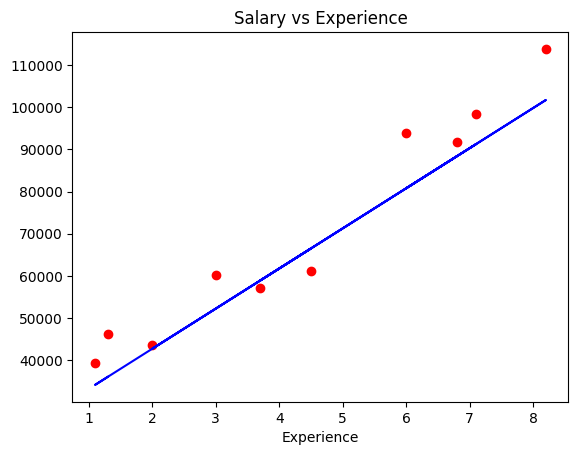

In [18]:
plt.scatter(X_test, Y_test, color = "red")
plt.plot(X_test, test_data_prediction, color = "blue")
plt.xlabel("Experience")
plt.title("Salary vs Experience")
plt.show()

### Let's Evaluate Our Model

In [23]:
from sklearn.metrics import r2_score
score = r2_score(Y_test, test_data_prediction)
print(f"The model's R2 Score is: : {score * 100:.2f}%")

The model's R2 Score is: : 90.41%


### In this project, we successfully built a Linear Regression model entirely from scratch using Object-Oriented Programming (OOP) and vectorization with NumPy.

### Key takeaways:
### - The custom Gradient Descent algorithm successfully converged.
### - We bypassed external predictive libraries (like Scikit-Learn) to deeply understand the underlying mathematics.
### - The model's predictions align closely with the actual data, as seen in the scatter plot and confirmed by the R2 Score.